# Redukcja wymiarowości

*Dimensionality reduction*

## SVD


Interpretacja geometryczna mnożenia macierzy

In [8]:
def plot_transform_xa(x,a):
    """
    wizualizacja mnozenia macierzy a * x
    """
    
    print(a)
    y = np.dot(x,a)
    
    plt.figure(figsize=(15,3.4))
    
    plt.subplot(1,4,1)
    
    plt.scatter(x[:,0],x[:,1])
    plt.xlim(-21,21)
    plt.ylim(-21,21)

    plt.subplot(1,4,2)
    plt.scatter(y[:,0],y[:,1])
    plt.xlim(-21,21)
    plt.ylim(-21,21)

    plt.subplot(1,4,3)
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    plt.arrow(0, 0, 0, 1, head_width=0.2, head_length=0.2, fc='red', ec='red')
    plt.arrow(0, 0, 1, 0, head_width=0.2, head_length=0.2, fc='red', ec='red')
 
    plt.subplot(1,4,4)
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    
    plt.arrow(0, 0, a[0,0],a[0,1], head_width=0.2, head_length=0.2, fc='red', ec='red')
    plt.arrow(0, 0, a[1,0],a[1,1], head_width=0.2, head_length=0.2, fc='red', ec='red')
    
    plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
x = np.array([[0, 0],
             [0, 1],
             [0, 2],
             [0, 3], 
             [0, 4],
             [0, 5],
             [0.5, 5],
             [1, 5],
             ])

print(x)

[[0.  0. ]
 [0.  1. ]
 [0.  2. ]
 [0.  3. ]
 [0.  4. ]
 [0.  5. ]
 [0.5 5. ]
 [1.  5. ]]


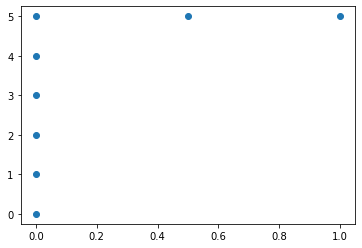

In [11]:
plt.scatter(x[:, 0], x[:, 1])

In [12]:
a = np.diag([4, 5])  # dane przeskalowane w osi x i y 4 krotnie
a

array([[4, 0],
       [0, 5]])

[[4 0]
 [0 5]]


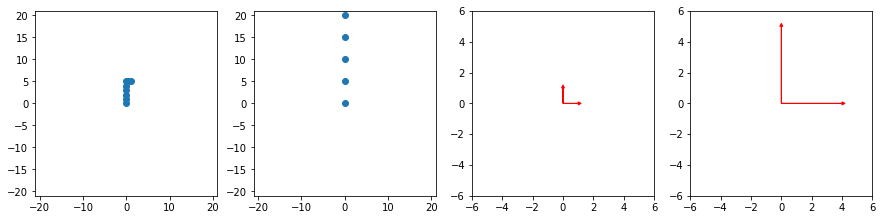

In [13]:
plot_transform_xa(x, a)

In [ ]:
# co tu widzimy? - 1 - punkty orginalne, 2 - punkty przetworzone, 3 - strzałki(wektory) reprezentujące nasz układ odniesienia, 4 - wektory reprezentujące przetworzony układ odniesienia

[[4 0]
 [0 2]]


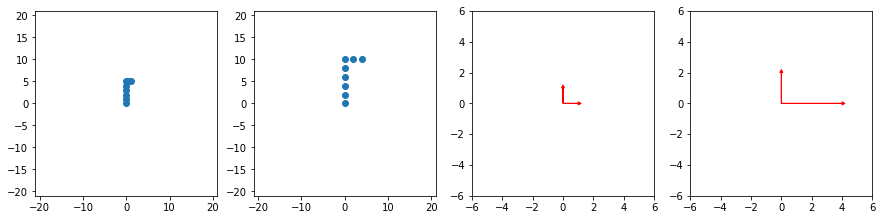

In [14]:
a = np.diag([4, 2])
plot_transform_xa(x, a)

In [ ]:
# wniosek - macierze diagonalne ą macierzami skalującymi 

[[ 2  3]
 [-1  4]]


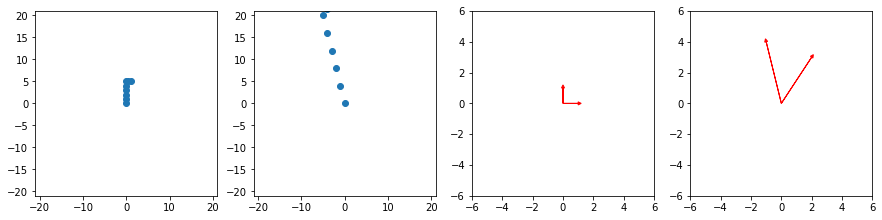

In [16]:
# dla dowolnej macierzy
a = np.array([[2, 3],
            [-1, 4]])
plot_transform_xa(x, a)

[[ 0.8660254 -0.5      ]
 [ 0.5       -0.8660254]]


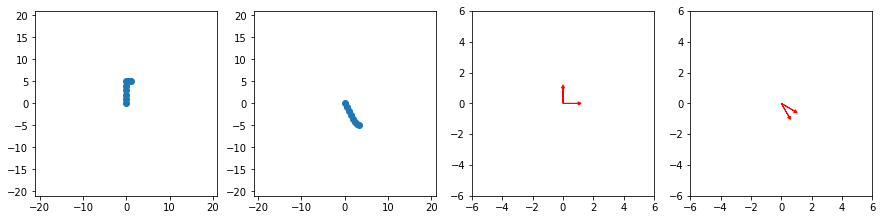

In [18]:
# macierz obrotu

t = np.pi / 6 

a = np.array([[np.cos(t), -np.sin(t)],
            [np.sin(t), -np.cos(t)]])
plot_transform_xa(x, a)

In [ ]:
# macierz obrotun musi być ortogonalna( wszytsie wekroy ktore sie znajują w tej macierzy muszą byc prostopadłe do siebie)
# czyli etedy gdy a * a' = I oraz det(a) = 1

[[ 3.46410162  2.        ]
 [-1.          1.73205081]]


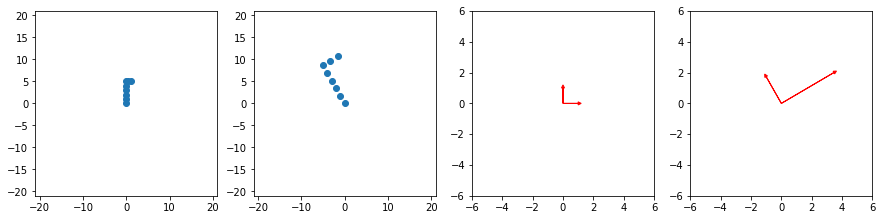

In [22]:
t = -np.pi / 6 # obrót o 30 stopni

o = np.array([[np.cos(t), -np.sin(t)], # macierz obrotu
            [np.sin(t), np.cos(t)]])
s = np.diag([4, 2]) # macierz diagonalna skalująca
a = np.matmul(s, o)

plot_transform_xa(x, a)

[[3.46410162 2.        ]
 [0.         0.        ]]


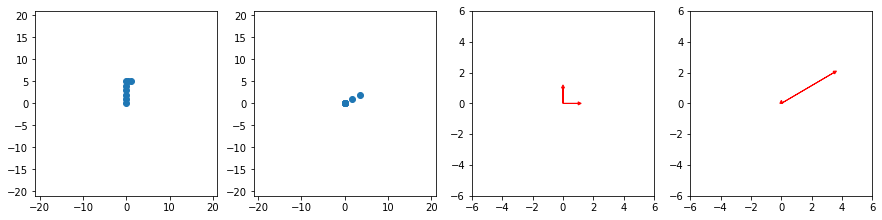

In [23]:
t = -np.pi / 6 # obrót o 30 stopni

o = np.array([[np.cos(t), -np.sin(t)], # macierz obrotu
            [np.sin(t), np.cos(t)]])
s = np.diag([4, 0]) # macierz diagonalna skalująca
a = np.matmul(s, o)

plot_transform_xa(x, a)

In [ ]:
# Podsumowując - mnożenie wektora przez macierz to reprezentacja tego wektora w innym układzie współrzędnych
# czyli zrzutowanie naszych punktów do nowej przestrzeni.

# Rozkład SVD 

## X - macierz $ m\times n$

rozkładamy macierz na trzy czynniki:


## $ X = U \times \Sigma \times V^t$

, gdzie: $U: m \times m , S: m \times n, V: n \times n $

- U i V - ortogonalne o wyznacznikach 1 (są to macierze zawierające wektory osobliwe). Są to macierze obrotu.
- $\Sigma$ - macierz wartości osobliwych - $diag(\sigma_1, ..., \sigma_k)$ ,  sigmy uporządkowane malejąco. Macierz jest tego samego wymiary co X zawsze (czyli diagonalna, ale prostokątna). Jest to macierz skalująca.

<img src="Grafika/svd.jpg" width="800">

Źródło: https://www.google.pl/search?q=svd&client=ubuntu&hs=LnO&channel=fs&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjI0b_Bj7HUAhUGQJoKHTXtAb8Q_AUICigB#channel=fs&tbm=isch&q=svd+decomposition&imgrc=jIHtm6dIDFPLAM:

## Interpretacja:

## $X^j = (U \Sigma V^t)^j = U \times (\Sigma V^t)^j = U \times \Sigma \times (V^t)^j$ 

czyli $j$-ta kolummna $X$ jest reprezentacją $j$-tej kolumy $(V^t)$, czyli $j$-tego wiersza $V$, gdzie

$X^j$ - cecha, którą obserwujemy, a $(V^t)^j$ to cech ukryta. 

<br>

<br>

<br>

<br>

### Analogicznie:

## $X_i = (U \Sigma V^t)_i = (U \Sigma)_i \times V^t = U_i \times \Sigma \times V^t$

#### Pytanie: po co nam to?

<br>

<br>

#### Odpowiedź:

#### Wartości elementów diagonali macierzy $\Sigma$ mówią o tym, jak ważna jest dana cecha ukryta!

Duża wartosć oznacza, że cecha jest istotna - zawiera dużo informacji. Mała - że nie jest ważna - jest szumem.


<br>

#### Zatem pomysł jest następujący: 

#### Wykorzystajmy do reprezentacji X tylko ważne cechy ukryte.

In [ ]:
# Przykład 1 - dwie silnie skorelowane zmienne

In [27]:
cov = np.array([[1, 0.999, 0],
               [0.999, 1, 0],
               [0, 0, 1]])
X = np.random.multivariate_normal(mean=[0, 0, 0], cov=cov, size=20)
X

array([[-4.60623073e-01, -4.15195398e-01,  7.46122261e-01],
       [ 1.60823018e+00,  1.57091845e+00,  5.45247879e-02],
       [ 4.21012092e-01,  4.39332876e-01, -2.83075516e-01],
       [ 4.71887770e-01,  5.06887413e-01,  3.38634848e-01],
       [-8.94911520e-01, -8.92408880e-01, -1.30737893e+00],
       [-3.82195175e-02, -2.14414104e-03, -5.78355241e-01],
       [ 9.59435111e-01,  9.80621367e-01, -1.94161737e-01],
       [ 8.45449921e-01,  8.65113857e-01, -7.57264272e-01],
       [ 1.19347426e+00,  1.24439364e+00,  3.00286675e-01],
       [ 2.41156915e-02,  9.00723253e-03,  2.70578586e-01],
       [ 7.43163450e-02,  9.36692617e-02, -3.55249304e-01],
       [ 7.21646951e-01,  7.46718374e-01,  3.47748919e-01],
       [ 7.67435791e-01,  7.28473351e-01, -5.01580361e-01],
       [-4.58344634e-01, -4.83407833e-01, -9.24576480e-01],
       [-1.80204059e+00, -1.80940267e+00, -7.35106893e-01],
       [-2.24617511e-01, -2.70263633e-01,  2.27078800e+00],
       [-9.93249824e-02, -1.03096288e-01

In [28]:
U, s, V = np.linalg.svd(X)

S = np.zeros_like(X)
np.fill_diagonal(S, s)
S

array([[5.01687166, 0.        , 0.        ],
       [0.        , 3.81685313, 0.        ],
       [0.        , 0.        , 0.09428245],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [29]:
U.shape, V.shape

((20, 20), (3, 3))

In [30]:
np.matmul(np.matmul(U, S), V) # ODDTWORZENIE PIERWOTNEGO X

array([[-4.60623073e-01, -4.15195398e-01,  7.46122261e-01],
       [ 1.60823018e+00,  1.57091845e+00,  5.45247879e-02],
       [ 4.21012092e-01,  4.39332876e-01, -2.83075516e-01],
       [ 4.71887770e-01,  5.06887413e-01,  3.38634848e-01],
       [-8.94911520e-01, -8.92408880e-01, -1.30737893e+00],
       [-3.82195175e-02, -2.14414104e-03, -5.78355241e-01],
       [ 9.59435111e-01,  9.80621367e-01, -1.94161737e-01],
       [ 8.45449921e-01,  8.65113857e-01, -7.57264272e-01],
       [ 1.19347426e+00,  1.24439364e+00,  3.00286675e-01],
       [ 2.41156915e-02,  9.00723253e-03,  2.70578586e-01],
       [ 7.43163450e-02,  9.36692617e-02, -3.55249304e-01],
       [ 7.21646951e-01,  7.46718374e-01,  3.47748919e-01],
       [ 7.67435791e-01,  7.28473351e-01, -5.01580361e-01],
       [-4.58344634e-01, -4.83407833e-01, -9.24576480e-01],
       [-1.80204059e+00, -1.80940267e+00, -7.35106893e-01],
       [-2.24617511e-01, -2.70263633e-01,  2.27078800e+00],
       [-9.93249824e-02, -1.03096288e-01

In [31]:
X

array([[-4.60623073e-01, -4.15195398e-01,  7.46122261e-01],
       [ 1.60823018e+00,  1.57091845e+00,  5.45247879e-02],
       [ 4.21012092e-01,  4.39332876e-01, -2.83075516e-01],
       [ 4.71887770e-01,  5.06887413e-01,  3.38634848e-01],
       [-8.94911520e-01, -8.92408880e-01, -1.30737893e+00],
       [-3.82195175e-02, -2.14414104e-03, -5.78355241e-01],
       [ 9.59435111e-01,  9.80621367e-01, -1.94161737e-01],
       [ 8.45449921e-01,  8.65113857e-01, -7.57264272e-01],
       [ 1.19347426e+00,  1.24439364e+00,  3.00286675e-01],
       [ 2.41156915e-02,  9.00723253e-03,  2.70578586e-01],
       [ 7.43163450e-02,  9.36692617e-02, -3.55249304e-01],
       [ 7.21646951e-01,  7.46718374e-01,  3.47748919e-01],
       [ 7.67435791e-01,  7.28473351e-01, -5.01580361e-01],
       [-4.58344634e-01, -4.83407833e-01, -9.24576480e-01],
       [-1.80204059e+00, -1.80940267e+00, -7.35106893e-01],
       [-2.24617511e-01, -2.70263633e-01,  2.27078800e+00],
       [-9.93249824e-02, -1.03096288e-01

In [ ]:
# PRZEANALIZUJMY WARTOŚCI NA DIAGONALI

In [32]:
S # WIDZIMY ZE OSTATNIA WARTOSC ZNACZNIE ODSTAJE OD POZOSTAŁYCH WIEC JA ZERUJEMY JAKO NIEISTOTNĄ

array([[5.01687166, 0.        , 0.        ],
       [0.        , 3.81685313, 0.        ],
       [0.        , 0.        , 0.09428245],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [33]:
S[2, 2] = 0
S

array([[5.01687166, 0.        , 0.        ],
       [0.        , 3.81685313, 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [34]:
np.matmul(np.matmul(U, S), V) # odtwoprzenie przyblizonego x 

array([[-0.43732423, -0.4384045 ,  0.74614125],
       [ 1.58644325,  1.59262146,  0.05450703],
       [ 0.42947436,  0.4309032 , -0.28306862],
       [ 0.4883367 ,  0.49050184,  0.33864826],
       [-0.89139535, -0.8959115 , -1.30737607],
       [-0.01987146, -0.02042153, -0.57834029],
       [ 0.96825289,  0.97183754, -0.19415455],
       [ 0.85395728,  0.85663926, -0.75725734],
       [ 1.21650377,  1.22145283,  0.30030545],
       [ 0.0164042 ,  0.01668902,  0.2705723 ],
       [ 0.08399441,  0.08402847, -0.35524142],
       [ 0.73264526,  0.73576242,  0.34775788],
       [ 0.74667639,  0.7491528 , -0.50159728],
       [-0.46961183, -0.47218403, -0.92458566],
       [-1.80193729, -1.80950557, -0.73510681],
       [-0.24793523, -0.24703572,  2.270769  ],
       [-0.10064955, -0.10177682, -0.90206574],
       [ 0.0530922 ,  0.05374495,  0.54686274],
       [ 0.44111777,  0.44177214, -1.28455591],
       [-0.78647245, -0.78861853,  1.09332145]])

In [35]:
X

array([[-4.60623073e-01, -4.15195398e-01,  7.46122261e-01],
       [ 1.60823018e+00,  1.57091845e+00,  5.45247879e-02],
       [ 4.21012092e-01,  4.39332876e-01, -2.83075516e-01],
       [ 4.71887770e-01,  5.06887413e-01,  3.38634848e-01],
       [-8.94911520e-01, -8.92408880e-01, -1.30737893e+00],
       [-3.82195175e-02, -2.14414104e-03, -5.78355241e-01],
       [ 9.59435111e-01,  9.80621367e-01, -1.94161737e-01],
       [ 8.45449921e-01,  8.65113857e-01, -7.57264272e-01],
       [ 1.19347426e+00,  1.24439364e+00,  3.00286675e-01],
       [ 2.41156915e-02,  9.00723253e-03,  2.70578586e-01],
       [ 7.43163450e-02,  9.36692617e-02, -3.55249304e-01],
       [ 7.21646951e-01,  7.46718374e-01,  3.47748919e-01],
       [ 7.67435791e-01,  7.28473351e-01, -5.01580361e-01],
       [-4.58344634e-01, -4.83407833e-01, -9.24576480e-01],
       [-1.80204059e+00, -1.80940267e+00, -7.35106893e-01],
       [-2.24617511e-01, -2.70263633e-01,  2.27078800e+00],
       [-9.93249824e-02, -1.03096288e-01

In [36]:
np.matmul(np.matmul(U[:, :2], S[:2, :2]), V[:2, :]) # odtworzenie przyblizonego x q loptymalny sposób

array([[-0.43732423, -0.4384045 ,  0.74614125],
       [ 1.58644325,  1.59262146,  0.05450703],
       [ 0.42947436,  0.4309032 , -0.28306862],
       [ 0.4883367 ,  0.49050184,  0.33864826],
       [-0.89139535, -0.8959115 , -1.30737607],
       [-0.01987146, -0.02042153, -0.57834029],
       [ 0.96825289,  0.97183754, -0.19415455],
       [ 0.85395728,  0.85663926, -0.75725734],
       [ 1.21650377,  1.22145283,  0.30030545],
       [ 0.0164042 ,  0.01668902,  0.2705723 ],
       [ 0.08399441,  0.08402847, -0.35524142],
       [ 0.73264526,  0.73576242,  0.34775788],
       [ 0.74667639,  0.7491528 , -0.50159728],
       [-0.46961183, -0.47218403, -0.92458566],
       [-1.80193729, -1.80950557, -0.73510681],
       [-0.24793523, -0.24703572,  2.270769  ],
       [-0.10064955, -0.10177682, -0.90206574],
       [ 0.0530922 ,  0.05374495,  0.54686274],
       [ 0.44111777,  0.44177214, -1.28455591],
       [-0.78647245, -0.78861853,  1.09332145]])

In [37]:
a = np.arange(1, 301). reshape((50, 6))
a # oryginale informacje

array([[  1,   2,   3,   4,   5,   6],
       [  7,   8,   9,  10,  11,  12],
       [ 13,  14,  15,  16,  17,  18],
       [ 19,  20,  21,  22,  23,  24],
       [ 25,  26,  27,  28,  29,  30],
       [ 31,  32,  33,  34,  35,  36],
       [ 37,  38,  39,  40,  41,  42],
       [ 43,  44,  45,  46,  47,  48],
       [ 49,  50,  51,  52,  53,  54],
       [ 55,  56,  57,  58,  59,  60],
       [ 61,  62,  63,  64,  65,  66],
       [ 67,  68,  69,  70,  71,  72],
       [ 73,  74,  75,  76,  77,  78],
       [ 79,  80,  81,  82,  83,  84],
       [ 85,  86,  87,  88,  89,  90],
       [ 91,  92,  93,  94,  95,  96],
       [ 97,  98,  99, 100, 101, 102],
       [103, 104, 105, 106, 107, 108],
       [109, 110, 111, 112, 113, 114],
       [115, 116, 117, 118, 119, 120],
       [121, 122, 123, 124, 125, 126],
       [127, 128, 129, 130, 131, 132],
       [133, 134, 135, 136, 137, 138],
       [139, 140, 141, 142, 143, 144],
       [145, 146, 147, 148, 149, 150],
       [151, 152, 153, 15

In [41]:
b = np.random.multivariate_normal([0]*15, np.diag([0.1]*15), 6)
b

array([[ 0.20915285, -0.67858436,  0.48358625, -0.14726847, -0.24337595,
        -0.3059194 ,  0.74720546,  0.15445244, -0.06208024,  0.05450896,
        -0.35256764,  0.31398177,  0.33277798,  0.86042572, -0.16234576],
       [-0.15347663,  0.12916286,  0.37565823, -0.16628876,  0.4364863 ,
         0.15362072,  0.32316775, -0.24023573,  0.08003208,  0.28320051,
        -0.00275401,  0.14445528, -0.27899964, -0.66948646, -0.07366543],
       [ 0.2531099 ,  0.27193691,  0.02531523, -0.21119334, -0.03968657,
         0.13743352, -0.63938487,  0.24637237, -0.23902161,  0.21981947,
         0.20018956,  0.29273086,  0.53861104, -0.12164403,  0.25635686],
       [-0.39957273, -0.21558392, -0.02276235, -0.02567743,  0.41364608,
        -0.12243438, -0.00145137, -0.24988237,  0.1229943 ,  0.51544584,
         0.11707928,  0.10641557, -0.42515025, -0.21901896,  0.13780948],
       [-0.43664979,  0.17869233,  0.34991481, -0.02339226,  0.04566904,
        -0.12611355,  0.09340145,  0.19030917, 

In [38]:
[2] *3

[2, 2, 2]

In [42]:
x = np.matmul(a, b)
x.shape

(50, 15)

In [44]:
np.set_printoptions(2, suppress=True)

In [45]:
b

array([[ 0.21, -0.68,  0.48, -0.15, -0.24, -0.31,  0.75,  0.15, -0.06,
         0.05, -0.35,  0.31,  0.33,  0.86, -0.16],
       [-0.15,  0.13,  0.38, -0.17,  0.44,  0.15,  0.32, -0.24,  0.08,
         0.28, -0.  ,  0.14, -0.28, -0.67, -0.07],
       [ 0.25,  0.27,  0.03, -0.21, -0.04,  0.14, -0.64,  0.25, -0.24,
         0.22,  0.2 ,  0.29,  0.54, -0.12,  0.26],
       [-0.4 , -0.22, -0.02, -0.03,  0.41, -0.12, -0.  , -0.25,  0.12,
         0.52,  0.12,  0.11, -0.43, -0.22,  0.14],
       [-0.44,  0.18,  0.35, -0.02,  0.05, -0.13,  0.09,  0.19, -0.21,
        -0.44,  0.1 ,  1.  , -0.25, -0.36, -0.21],
       [-0.16,  0.28,  0.29,  0.31, -0.08, -0.12,  0.06, -0.4 ,  0.07,
        -0.04,  0.17,  0.22,  0.01, -0.26, -0.42]])

In [47]:
U, s, V = np.linalg.svd(x)
S = np.zeros_like(x)
np.fill_diagonal(S, s)
s

array([3738.86,   17.79,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ])

In [48]:
x_restorted = np.matmul(np.matmul(U[:, :2], S[:2, :2]), V[:2, :])
x_restorted

array([[  -4.08,    2.1 ,    4.71,    0.54,    1.93,   -1.44,    0.3 ,
          -2.06,   -0.74,    0.87,    2.21,    8.21,   -1.5 ,   -5.08,
          -2.58],
       [  -8.21,    1.88,   13.71,   -1.02,    5.15,   -3.76,    3.81,
          -3.88,   -2.15,    4.39,    3.59,   20.65,   -1.95,   -9.7 ,
          -5.42],
       [ -12.33,    1.66,   22.72,   -2.59,    8.36,   -6.08,    7.31,
          -5.71,   -3.56,    7.92,    4.96,   33.09,   -2.39,  -14.32,
          -8.27],
       [ -16.46,    1.45,   31.72,   -4.15,   11.57,   -8.4 ,   10.81,
          -7.53,   -4.97,   11.44,    6.34,   45.54,   -2.84,  -18.94,
         -11.11],
       [ -20.58,    1.23,   40.73,   -5.72,   14.79,  -10.71,   14.32,
          -9.35,   -6.38,   14.97,    7.71,   57.98,   -3.28,  -23.56,
         -13.96],
       [ -24.71,    1.01,   49.74,   -7.29,   18.  ,  -13.03,   17.82,
         -11.17,   -7.79,   18.49,    9.08,   70.42,   -3.73,  -28.18,
         -16.81],
       [ -28.83,    0.8 ,   58.74,   -8.

In [49]:
x  # widać że to są te same wartości 

array([[  -4.08,    2.1 ,    4.71,    0.54,    1.93,   -1.44,    0.3 ,
          -2.06,   -0.74,    0.87,    2.21,    8.21,   -1.5 ,   -5.08,
          -2.58],
       [  -8.21,    1.88,   13.71,   -1.02,    5.15,   -3.76,    3.81,
          -3.88,   -2.15,    4.39,    3.59,   20.65,   -1.95,   -9.7 ,
          -5.42],
       [ -12.33,    1.66,   22.72,   -2.59,    8.36,   -6.08,    7.31,
          -5.71,   -3.56,    7.92,    4.96,   33.09,   -2.39,  -14.32,
          -8.27],
       [ -16.46,    1.45,   31.72,   -4.15,   11.57,   -8.4 ,   10.81,
          -7.53,   -4.97,   11.44,    6.34,   45.54,   -2.84,  -18.94,
         -11.11],
       [ -20.58,    1.23,   40.73,   -5.72,   14.79,  -10.71,   14.32,
          -9.35,   -6.38,   14.97,    7.71,   57.98,   -3.28,  -23.56,
         -13.96],
       [ -24.71,    1.01,   49.74,   -7.29,   18.  ,  -13.03,   17.82,
         -11.17,   -7.79,   18.49,    9.08,   70.42,   -3.73,  -28.18,
         -16.81],
       [ -28.83,    0.8 ,   58.74,   -8.

In [ ]:
# WNIOSEK - ZA POMOCĄ DWÓCH ZMIENNYCH BEZSTRATNIE ODTWORZYLISMY CAŁY ZBIOR SKŁADAJĄCY SIĘ Z 15 ZMIENNYCH 

In [51]:
# PRZYKŁAD 3 - ZMIENNE NIEZALEŻNE Z DODANYM SZUMEM 

a = np.random.multivariate_normal(mean=[0]*6, cov=np.diag([0.1]*6), size=100)

b = np.random.multivariate_normal([0]*15, np.diag([0.4]*15), 6)
noise = np.random.multivariate_normal([0]*15, np.diag([0.01]*15), 100)

X = np.matmul(a, b) + noise
X

array([[-0.55, -0.11,  0.44, ...,  0.25, -0.15,  0.39],
       [ 0.59, -0.  , -0.23, ...,  0.6 ,  0.34, -0.17],
       [-0.47, -0.3 , -0.07, ...,  0.31,  0.42, -0.19],
       ...,
       [ 0.33, -1.37,  0.68, ...,  1.07,  0.65, -0.79],
       [ 0.25, -1.03, -0.5 , ...,  0.64,  0.37, -0.64],
       [ 0.44,  0.18,  0.09, ..., -0.24, -0.1 ,  0.06]])

In [52]:
U, s, V = np.linalg.svd(X)
S= np.zeros_like(X) 
np.fill_diagonal(S, s)

<BarContainer object of 15 artists>

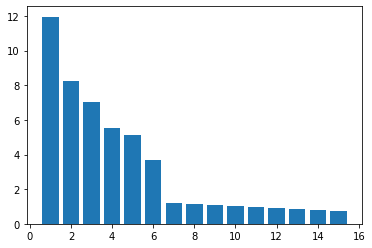

In [53]:
plt.bar(range(1, len(s)+1), s)

obserwujemy wyraźne odcięcie 6 pierwszych zmiennych od reszty ( nieskompresowany szum). W takim przypadku bierzemy pierwsze 6 zmiennych i na ich podstawie możemy odbudować przybliżony dataset.

In [54]:
X_restorted = np.matmul(np.matmul(U[:, :6], S[:6, :6]), V[:6, :])
X_restorted

array([[-0.49,  0.02,  0.47, ...,  0.25, -0.09,  0.42],
       [ 0.6 , -0.09, -0.17, ...,  0.54,  0.31, -0.12],
       [-0.49, -0.29, -0.15, ...,  0.3 ,  0.34, -0.21],
       ...,
       [ 0.17, -1.4 ,  0.72, ...,  0.95,  0.74, -0.9 ],
       [ 0.23, -0.82, -0.43, ...,  0.72,  0.31, -0.71],
       [ 0.35,  0.11,  0.09, ..., -0.28, -0.25,  0.03]])

In [55]:
np.matmul(a, b)  # porównujemy z tym co było oryginalnie

array([[-0.54,  0.05,  0.47, ...,  0.17, -0.2 ,  0.46],
       [ 0.68, -0.06, -0.08, ...,  0.52,  0.36, -0.15],
       [-0.52, -0.34, -0.11, ...,  0.36,  0.4 , -0.31],
       ...,
       [ 0.11, -1.35,  0.63, ...,  0.98,  0.73, -0.9 ],
       [ 0.23, -0.76, -0.34, ...,  0.75,  0.31, -0.71],
       [ 0.37,  0.15,  0.05, ..., -0.34, -0.26,  0.08]])

<BarContainer object of 15 artists>

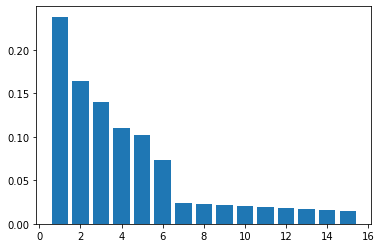

In [56]:
s_norm = s / sum(s)

plt.bar(range(1, len(s)+1), s_norm)

<BarContainer object of 15 artists>

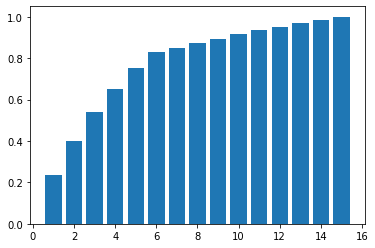

In [59]:
plt.bar(range(1, len(s)+1), np.cumsum(s_norm))  # widzimy ze po 6 fitcherze juz niewiele nam przyrasta  - dla 6 zmiennych zatrzymujemy pokoło 80% informacji

# Przetwarzanie obrazu

http://www.ams.org/samplings/feature-column/fcarc-svd

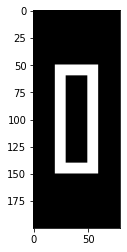

In [60]:
x = np.zeros ((200, 80))
x[50:150, 20:60] = 1
x[60:140, 30:50] = 0
plt.imshow(x, cmap= 'gray')

In [61]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

zaszumiamy obraz
losujemy indeksy pikseli

In [69]:
random_indices = np.random.choice([0, 1], size=x.shape).nonzero()

x[random_indices] = x[random_indices] + np.random.normal(0, 0.3, len(random_indices[0]))
x

array([[ 0.  ,  0.  , -0.18, ...,  0.  ,  0.  ,  0.2 ],
       [-0.23,  0.  ,  0.24, ...,  0.  ,  0.  ,  0.07],
       [ 0.26, -0.27,  0.  , ...,  0.25,  0.45, -0.48],
       ...,
       [ 0.35,  0.  ,  0.  , ...,  0.64, -0.17,  0.14],
       [ 0.22, -0.57,  0.2 , ...,  0.13, -0.18, -0.05],
       [ 0.  ,  0.75, -0.05, ...,  0.  ,  0.05,  0.  ]])

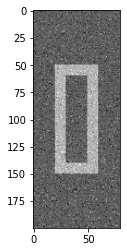

In [82]:
plt.imshow(x, cmap= 'gray')

### Zadanie: odszumić obrazek

In [83]:
U, s, V = np.linalg.svd(x)
S= np.zeros_like(x) 
np.fill_diagonal(S, s)

<BarContainer object of 80 artists>

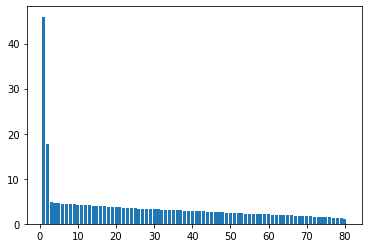

In [84]:
plt.bar(range(1, len(s)+1), s)

zobaczmy jak beda wygladaly obrazki dla roznych zmiennych ukrytych

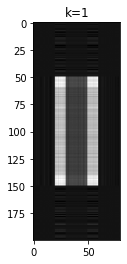

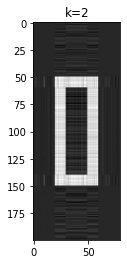

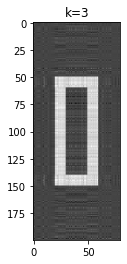

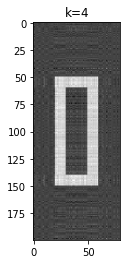

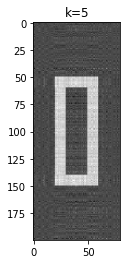

In [86]:
for k in range(1, 6):
    x_restorted = np.matmul(np.matmul(U[:, :k], S[:k, :k]), V[:k, :])
    plt.figure()
    plt.imshow(x_restorted, cmap='gray')
    plt.title(f"k={k}")

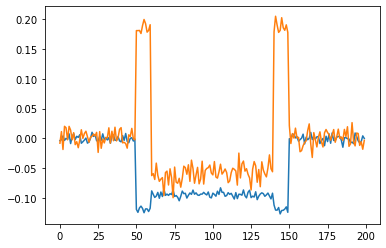

In [88]:
plt.plot(U[:, :2])

### Zadanie - zredukować reprezentację obrazka kolorowego

Zadanie dodatkowe - podać ile bajtów zajmuje normalna reprezentacja, a ile reprezentacja zredukowana dobrej jakości

In [89]:
import PIL.Image as Image

In [90]:
im = Image.open('Dane/Obrazy/1.jpg')

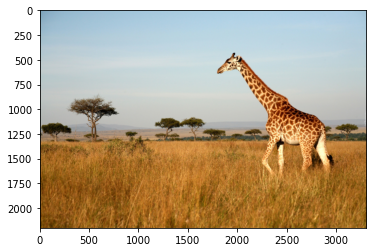

In [91]:
plt.imshow(im)

In [96]:
type(im)

PIL.JpegImagePlugin.JpegImageFile

In [100]:
im = np.array(im) / 255

In [101]:
type(im)

numpy.ndarray

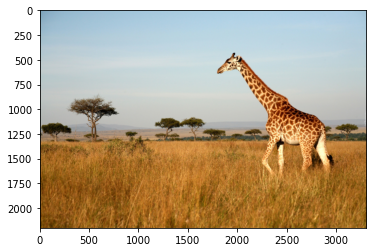

In [102]:
plt.imshow(im)

In [104]:
im_r = im[:, :, 0]
im_g = im[:, :, 1]
im_b = im[:, :, 2]

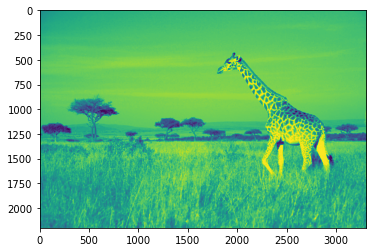

In [105]:
plt.imshow(im_r)

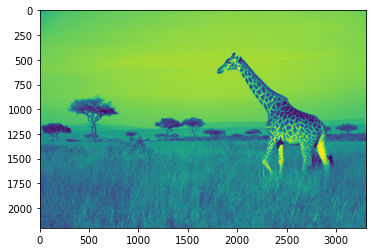

In [138]:
plt.imshow(im_g)

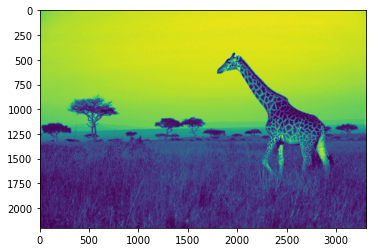

In [139]:
plt.imshow(im_b)

In [140]:
U_r, s_r, V_r = np.linalg.svd(im_r)
U_g, s_g, V_g = np.linalg.svd(im_g)
U_b, s_b, V_b = np.linalg.svd(im_b)

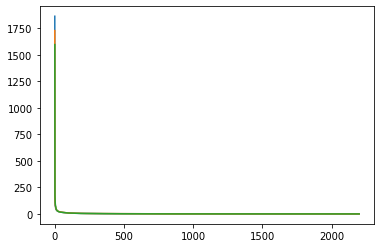

In [141]:
plt.plot(s_r)
plt.plot(s_g)
plt.plot(s_b)

<BarContainer object of 2200 artists>

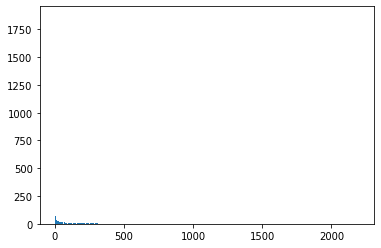

In [142]:
U_r, s_r, V_r = np.linalg.svd(im_r)
S= np.zeros_like(im_r) 
np.fill_diagonal(S, s)

plt.bar(range(1, len(s)+1), s)

In [131]:
for k in range(79, 89):
    im_r_restored = np.matmul(np.matmul(U_r[:, :k], S[:k, :k]), V_r[:k, :])
    plt.figure()
    plt.imshow(im_r_restored)
    plt.title(f"k={k}")

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

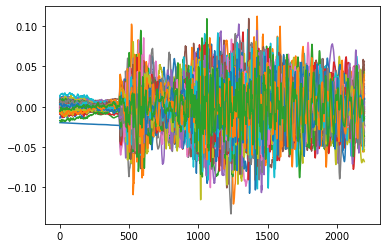

In [122]:
plt.plot(U[:, :93])

In [146]:
im_r_restored = np.matmul(np.matmul(U_r[:, :k], np.diag(s_r[:k]), V_r[:k, :])
im_g_restored = np.matmul(np.matmul(U_g[:, :k], np.diag(s_g[:k]), V_g[:k, :])
im_b_restored = np.matmul(np.matmul(U_b[:, :k], np.diag(s_b[:k]), V_b[:k, :])

SyntaxError: invalid syntax (<ipython-input-146-e2ca77e69526>, line 2)

In [147]:
for k in [1, 2, 5, 10, 20, 50, 100, 200]:
    im_r_restored = np.matmul(np.matmul(U_r[:, :k], np.diag(s_r[:k]), V_r[:k, :])
    im_g_restored = np.matmul(np.matmul(U_g[:, :k], np.diag(s_g[:k]), V_g[:k, :])
    im_b_restored = np.matmul(np.matmul(U_b[:, :k], np.diag(s_b[:k]), V_b[:k, :])
                              
    im_r_restored                          
                              
    plt.figure()
    plt.imshow(im_r_restored)
    plt.imshow(im_g_restored)
    plt.imshow(im_b_restored)
    plt.title(f"k={k}")
    

SyntaxError: invalid syntax (<ipython-input-147-75a7b0bc2ee8>, line 3)

In [ ]:
im_r_restored =
im_g_restored =
im_b_restored =

In [ ]:
im_restored - np.zeros_like(im)
im_restored.shape

# Case study 

### Zaprojektować wyszukiwarkę: dla danego zapytania znaleźć tekst najbardziej adekwatny.

Podstawowy sposób reprezentacji tekstu to macierz wystąpień słów w dokumentach - oznacza to bardzo duży wymiar danych... 

Dlatego potrzebna redukcja. Pomysł: wykryć znaczenie tekstu znajdując ukryte cechy.

W praktyce rozkład SVD stosuje się w analizie podobieństwa tekstów (wyszukiwarki, systemy rekomendacyjne).

In [149]:
documents = [
    "morze plaża woda słońce piasek",
    "morze plaża piasek woda",
    "morze plaża słońce",
    "plaża woda piasek",
    "słońce woda plaża",
    "piasek woda",
    "krowa pies papuga",
    "pies kot"
]

In [150]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
dtm = cv.fit_transform(documents)

In [152]:
x = dtm.todense().A.T # transponujemy aby miec słowa jako wiersze a dokumenty jako kolumny
x

array([[0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0],
       [1, 1, 0, 1, 1, 1, 0, 0]], dtype=int64)

### Nasz cel - wyreprezentować dokumenty w niżej wymiarowej przestrzeni - znaleźć ich znaczenie.

Spojrzmy na wyglad dokumentow w powyzszej przestrzeni cech ukrytych

In [153]:
U, s, V = np.linalg.svd(x)
U

array([[ 0.  ,  0.28, -0.  , -0.72,  0.  ,  0.  , -0.  ,  0.45, -0.44],
       [ 0.  ,  0.45, -0.  ,  0.45, -0.  ,  0.  , -0.  ,  0.72,  0.29],
       [-0.35, -0.  , -0.34, -0.  , -0.76,  0.15,  0.39,  0.  , -0.  ],
       [ 0.  ,  0.45, -0.  ,  0.45, -0.  , -0.  , -0.  , -0.26, -0.73],
       [-0.44,  0.  ,  0.55,  0.  , -0.31,  0.23, -0.6 , -0.  ,  0.  ],
       [ 0.  ,  0.72, -0.  , -0.28,  0.  , -0.  , -0.  , -0.45,  0.44],
       [-0.55, -0.  , -0.27,  0.  ,  0.12, -0.76, -0.2 ,  0.  ,  0.  ],
       [-0.32, -0.  , -0.59,  0.  ,  0.38,  0.57, -0.28, -0.  ,  0.  ],
       [-0.53,  0.  ,  0.41,  0.  ,  0.4 ,  0.15,  0.61,  0.  , -0.  ]])

In [154]:
s/sum(s)

array([0.36, 0.18, 0.16, 0.11, 0.1 , 0.06, 0.03, 0.  ])

In [155]:
np.cumsum(s/sum(s))

array([0.36, 0.53, 0.7 , 0.8 , 0.91, 0.97, 1.  , 1.  ])

In [156]:
k = 2 # bierzemy dwie najistotniejsze cechy ukryte ze względu na fakt, że chcemy je wyświetlić w 2d
x_n = V[:k, :] # przycięta reprezentacja naszych dokumentów
x_n

array([[-0.57, -0.48, -0.32, -0.39, -0.36, -0.25,  0.  ,  0.  ],
       [-0.  ,  0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.85,  0.53]])

In [159]:
latent_vars = x_n.T
latent_vars

array([[-0.57, -0.  ],
       [-0.48,  0.  ],
       [-0.32, -0.  ],
       [-0.39, -0.  ],
       [-0.36,  0.  ],
       [-0.25,  0.  ],
       [ 0.  ,  0.85],
       [ 0.  ,  0.53]])

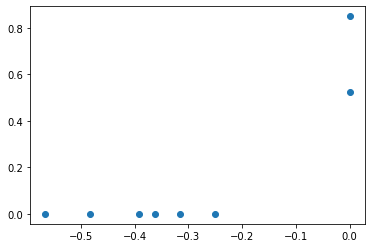

In [161]:
plt.scatter(latent_vars[:, 0], latent_vars[:, 1])
for i in range(latent_vars.shape[0]):
    plt.annotate(s=documents[i],
                xy=(latent_vars[i, 0], latent_vars[i, 1])
                )

### Pytanie: jak wyreprezentować przychodzące zapytanie w naszej przestrzeni V?

Spójrzmy jak otrzymać V z X mając rozkład svd:

$ X = USV \ \ $ => $ \ \ U^{-1} X = SV^t \ \ $ => $ \ \ S^{-1} U^{-1} X = V^t$ 

i wiemy, że $U^{-1} = U^t$.

Zatem co zrobić z nowym zapytanie, żeby otrzymać jego reprezentację w V? To samo co z X, czyli:

$ V^t_{nowe} = S^{-1} U^t X_{nowy}$

### SVD w sklearn.

Oczywiście w sklearn istnieje gotwe narzędzie do robienia rozkładu sklearn i działa ona w konwencji sklearna - mamy gotowy obiekt, który można dopasować do danych i zrobić wszystko co potrzebujemy:

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
<br>

<br>

# PCA


<img src="Grafika/pca1.png" width="740">

<img src="Grafika/pca2.png" width="400">

Źródło: https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0

<img src="Grafika/PCA.png" width="800">

Źródło: https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

### Uwaga na skalę zmiennych!

### Zadanie. Rozważmy zbiór ryb. Ile wymiarów wystarczy, żeby je dobrze wyreprezentować?

C:\Users\Waldemar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


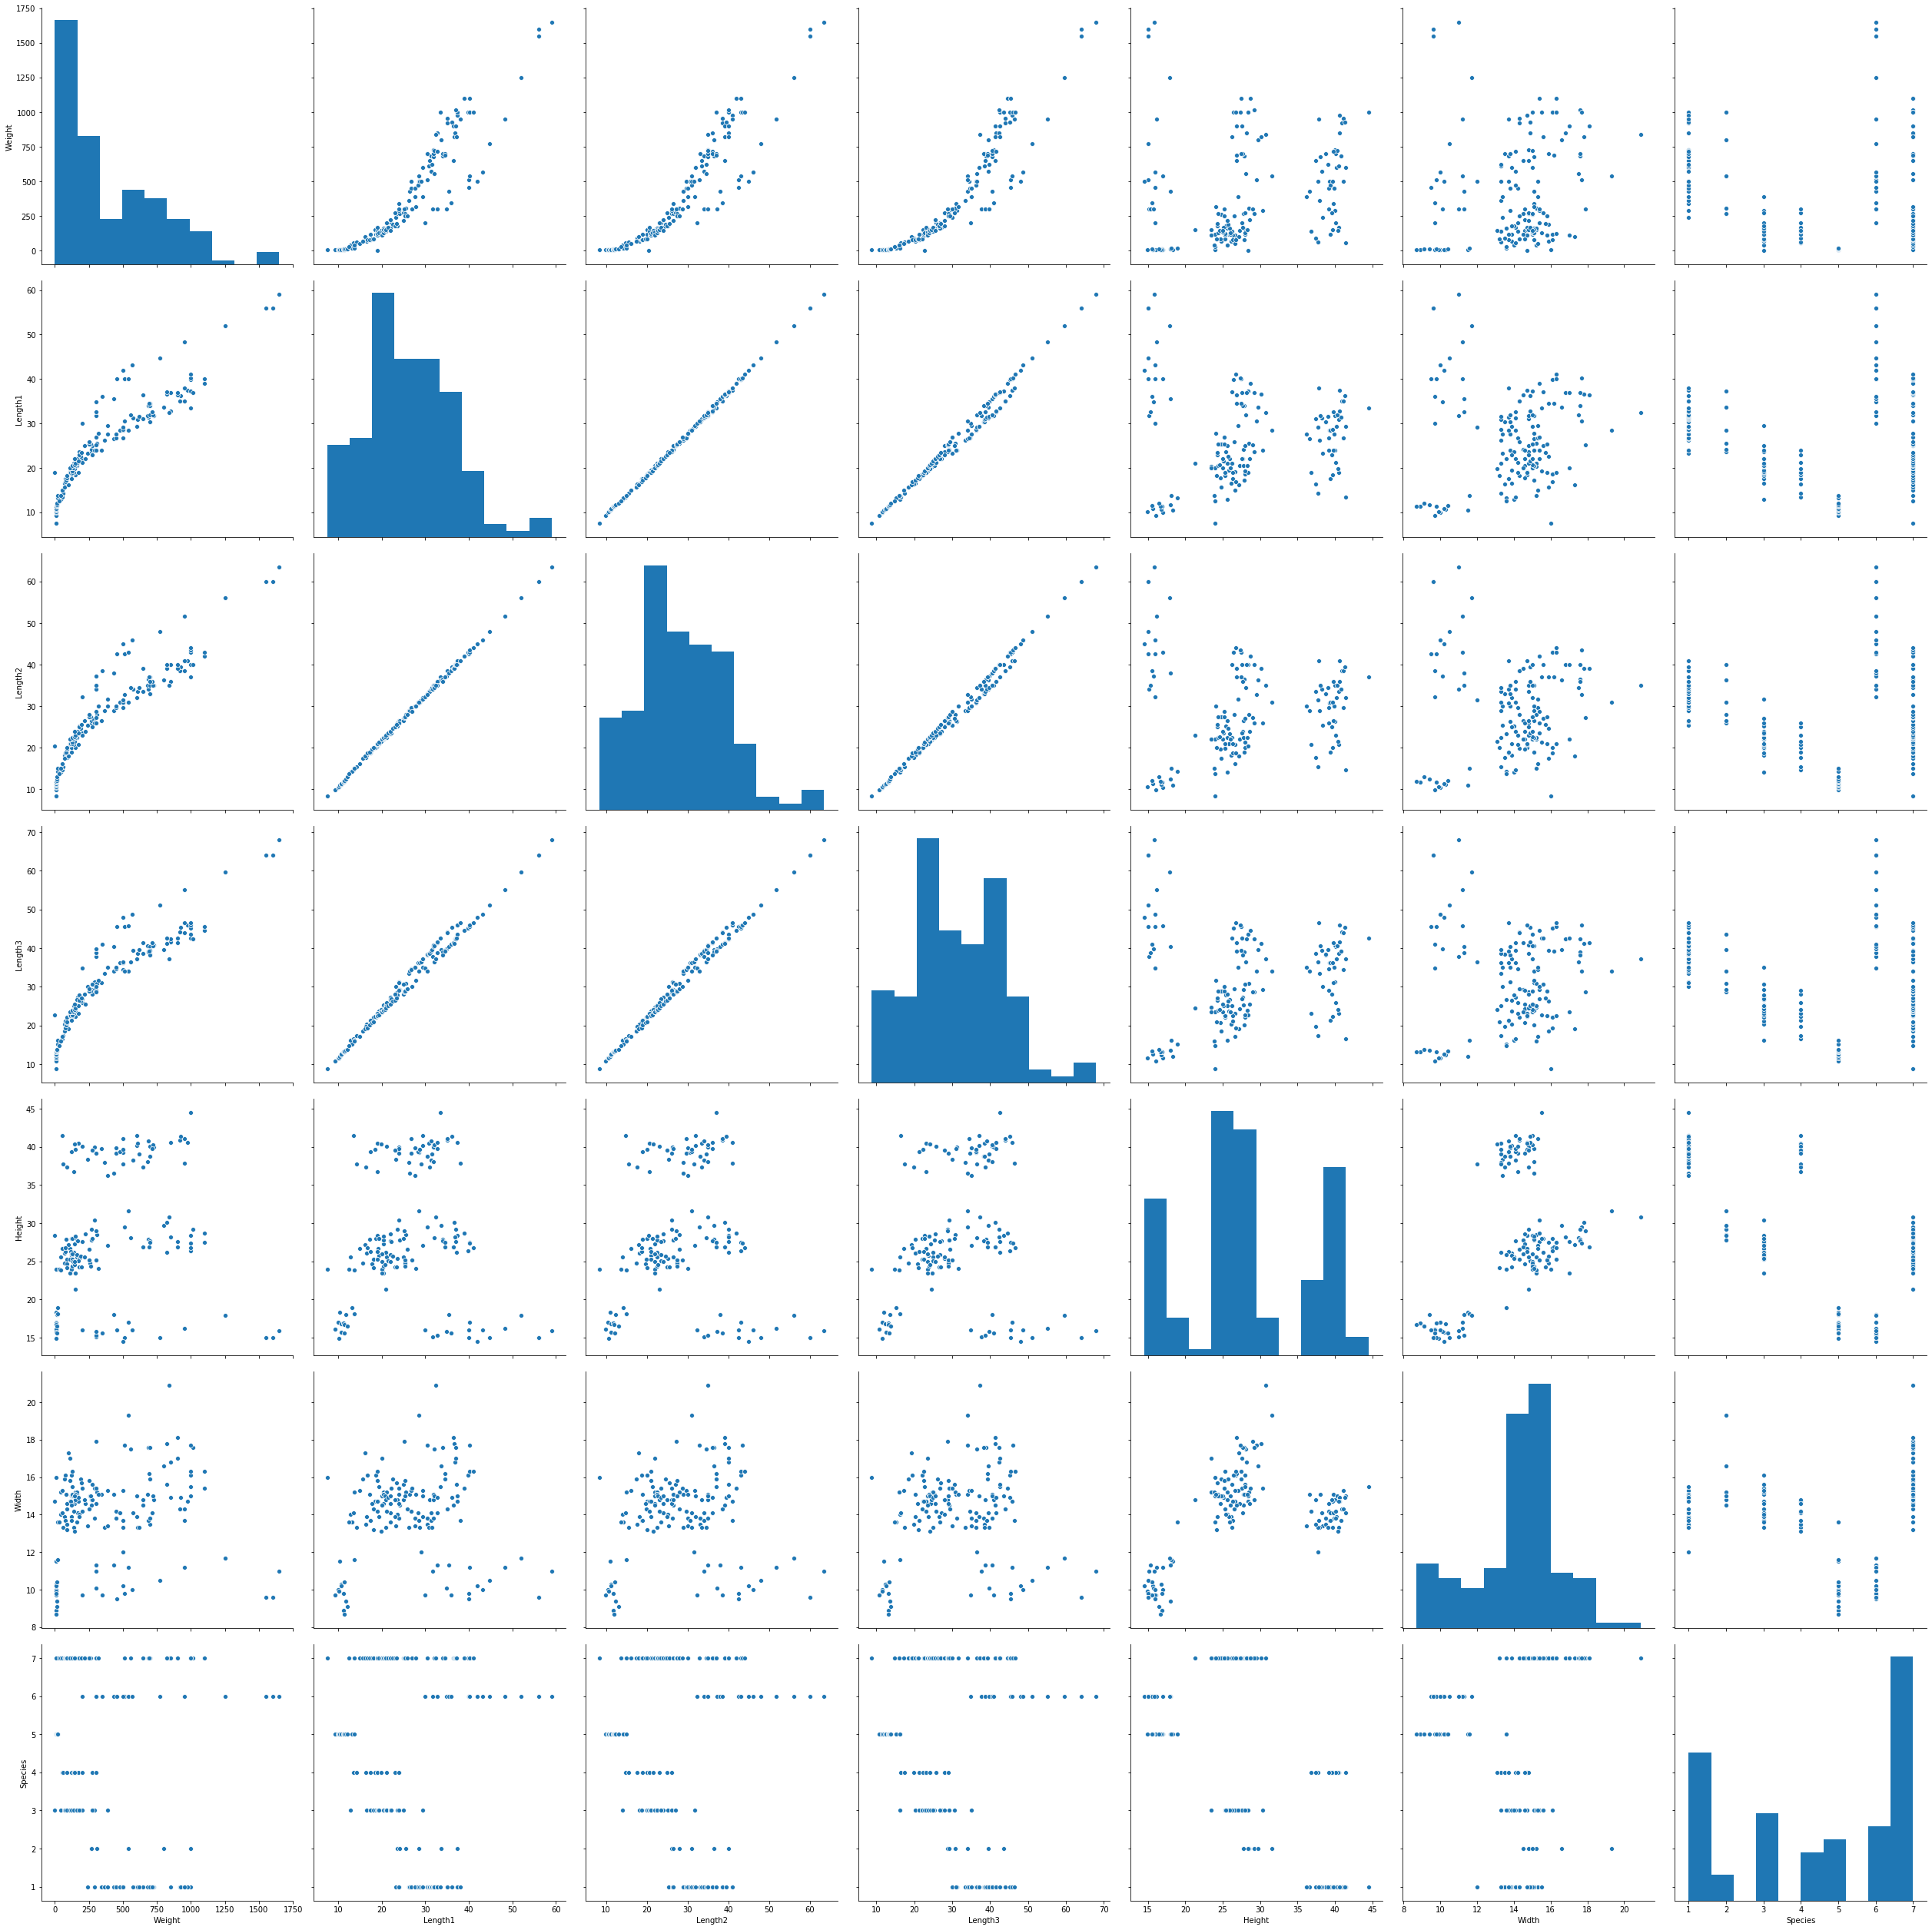

In [80]:
import pandas as pd
samples = pd.read_csv("Dane/fish.csv", sep=";",decimal=",")

### Zadanie:

Na podstawie danych food, określić podobieństwo między zwyczajami jedzeniowymi mieszkańców krajów Wielkiej Brytanii.

http://www.dsc.ufcg.edu.br/~hmg/disciplinas/posgraduacao/rn-copin-2014.3/material/SignalProcPCA.pdf

Przygotowanie danych wspólnie - model i interpretacja - zadanie samodzielne.

In [4]:
import pandas as pd
food = pd.read_csv("Dane/food.txt",delimiter=" ",comment="#")
food.head()

,food,England,Wales,Scotland,Ireland
0,Cheese,105,103,103,66
1,Carcass-meat,245,227,242,267
2,Other-meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats-and-oils,193,235,184,209


## Zadanie 2: przeanalizować charakterystyki miast przy użyciu PCA - zinterpretować składowe

In [101]:
miasta = pd.read_csv("Dane/Miasta.txt",sep="\t+")
miasta.head()

C:\Users\Waldemar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Work,Price,Salary
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5


### Zadanie 

Inne miasta - przeanalizować miasta przy użyciu PCA: ile głównych składowych, zinterpretować je, zidentyfikować wyróżniające się miasta


2. http://www.stat.nthu.edu.tw/~swcheng/Teaching/stat5191/assignment/assignment2.html

In [105]:
dane = pd.read_csv("Dane/places.txt",sep="\s+",header=0)
dane = dane.iloc[:,range(9)]
dane.head()

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ
"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


## Zastosowanie PCA do redukcji wymiaru dla regresji liniowej

*Ciekawostka: połączenie regresji liniowej z PCA jest nazywane PCR*

 Dane longley: https://www.datarobot.com/blog/ordinary-least-squares-in-python/

In [110]:
import pandas as pd
df = pd.read_csv('Dane/longley.csv', index_col=0)
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


### Zadanie

Użyć PCA do redukcji wymiaru dla modelu regresji na danych yarn (p>n) i porównać z regresją lasso.

In [121]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.simplefilter('ignore', FutureWarning)

In [122]:
import pandas as pd

df = pd.read_csv("Dane/yarn.txt",sep=" ",index_col=0)
print(df.shape)
df.head().iloc[:,-5:]

(28, 270)


,V266,V267,V268,V269,V270
1,0.29440,0.29432,0.29443,100.00,1
2,0.30031,0.30030,0.30041,80.22,1
3,0.32464,0.32460,0.32474,79.49,1
4,0.30928,0.30932,0.30947,60.80,1
5,0.31021,0.31026,0.31049,59.97,1


### Zadanie domowe

Zadanie klasyfikacji "spam or ham"z pierwszych zajęć - przetestować pipeline z uwzględnieniem redukcji wymiaru przy użyciu SVD.

### Źródła i materiały


http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py


http://www.ams.org/samplings/feature-column/fcarc-svd

https://bugra.github.io/work/notes/2014-11-16/an-introduction-to-unsupervised-learning-scikit-learn/

https://alyssaq.github.io/2015/singular-value-decomposition-visualisation/
 
Przykład obrazujący dlaczego PCA może zaszkodzić:

https://blog.drskippy.com/2012/05/14/dimension-reduction-for-machine-learning-simple-example-of-svd-pca-pathology/